<a href="https://colab.research.google.com/github/strongway/tutorial_data_science/blob/master/lecture_2024/basic_statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basis Statistics and Hypothesis Testing Using Python


## 1. Variable types and Statistical tests

General speaking, statistical tests and models examine the relationship between independent variables (IVs, predictor variables) and dependent variables (DVs, outcome variables). In psychological studies, we apply manipulations or treatments to observe different outcomes. For example, we might compare performance differences among groups or determine if a treatment improves learning skills. The groups or treatments we compare are the IVs, and the observed outcomes are the DVs.

Variables can be classified into four types: _Nominal, ordinal, interval, and ratio_. Depending on the types of IV and DV, different statistical tests are required.

Examples:
* Nominal: Gender (male/female), binary response (left/right)
* Ordinal: Preference (first, second, third), ranking
* Interval: Temperature (no true zero, can be below 0)
* Ratio: Height, age (has a true zero, never falls below 0).

### Choosing a statistical test

A very useful chart I borrowed from scribbr.com/statistics: 
![](https://cdn.scribbr.com/wp-content/uploads//2020/01/flowchart-for-choosing-a-statistical-test.png)



**Note**: This is not a comprehensive statistics course. We will not cover all statistical tests in detail. Instead, we will focus on the main statistical tests that you can apply to your research projects and provide a basic understanding for the upcoming computational neuroscience topics. In this crash course, we will primarily discuss standard t-tests, ANOVA (including repeated-measures), and correlation analysis. In the following two weeks, we will cover simple regression and logistic regression. The goal is to understand the fundamental concepts of statistical tests and how to apply them to real research studies, with an emphasis on practical usage.

In Python, several statistical packages are available, such as `scipy` and `statsmodels`.

- `scipy` is a collection of numerical algorithms and domain-specific toolboxes, which includes not only statistics but also image analysis, signal processing, and more. It primarily uses `numpy` matrices and arrays for data representation.
  
- `statsmodels` is a statistical modeling package that provides many classes and functions for statistical estimation, such as general linear models (GLM) and time-series models. It uses data frames (pandas) and formula notation, similar to R statistics.

However, neither of these packages provides all the statistical metrics we often need in a single test (similar to JASP or SPSS), such as effect size, Bayes factor, and post-hoc tests. To achieve comprehensive statistical analysis, you typically need to combine multiple packages. Fortunately, the newly developed package [`pingouin`](https://pingouin-stats.org/) addresses this issue by offering essential statistics in one place. The author of `pingouin`, [Raphael Vallat](https://raphaelvallat.com/), is a neuroscientist specialized in sleep, health and warables, who understands the needs of psychologists for statistics.


In [ ]:
# a statistical pacakge pingouin we need. See subsection 3. 
# uncomment the following if you need to install it
#!pip install pingouin

In [13]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import scipy.stats as st #  statistics from scipy
import matplotlib.pyplot as plt  # visualization
import seaborn as sns  # statistical visualization
import pingouin as pg  # statistical test
# Set the default Pandas float precision to 3 decimals
pd.set_option("display.precision", 3)
pd.set_option("display.max_rows",5)
%matplotlib inline


## 2. Hypothesis testing with Z-score

Hypothesis testing is a fundamental statistical process used to determine whether an assumption, often related to the mean of a sample, is consistent with the characteristics of a specific population. This process helps statisticians and researchers assess the likelihood that a given observation could have occurred under a certain hypothesis. Central to hypothesis testing is the definition of outlier criteria, represented by the significance level (alpha), which sets the threshold for rejecting the null hypothesis. Commonly, alpha values such as 0.05 (divided equally between two tails as 0.025 each) indicate the probability of finding extreme values by chance.

In the context of a normal distribution, the z-score serves as a standardized measure to determine how far a data point deviates from the mean in terms of standard deviations. By calculating z-scores, researchers can visualize the outlier regions on a normal curve, typically at the two tails. 

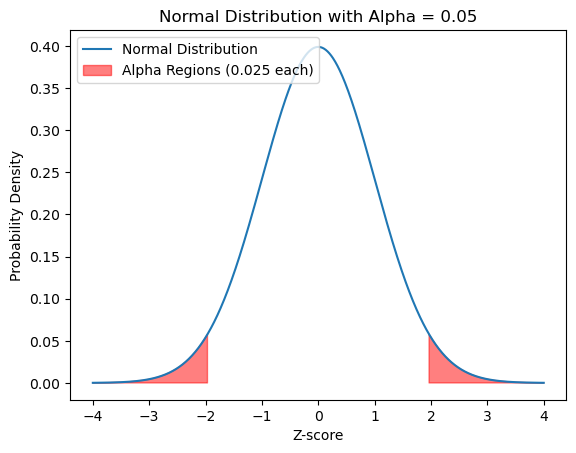

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Generate x values for the normal distribution
x = np.linspace(-4, 4, 1000)
y = norm.pdf(x, 0, 1)

# Plot the normal distribution curve
plt.plot(x, y, label='Normal Distribution')

# Highlight the critical regions (tails)
alpha = 0.05
z_critical = norm.ppf(1 - alpha / 2)
plt.fill_between(x, y, where=(x <= -z_critical) | (x >= z_critical), color='red', alpha=0.5, label='Alpha Regions (0.025 each)')

# Labels and title
plt.title('Normal Distribution with Alpha = 0.05')
plt.xlabel('Z-score')
plt.ylabel('Probability Density')
plt.legend(loc='upper left')
plt.show()


If the z-score of a sample falls within these tails beyond the defined alpha level, it suggests that the sample is statistically significant, leading to the rejection of the null hypothesis. This structured approach enables clear decision-making in testing assumptions and assessing the probability of observed data within a distribution.

In statistics, we construct z-scores using the formula:
$$z = \frac{x - \mu}{\sigma}$$

where $x$ is the sample mean, $\mu$ is the population mean, and $\sigma$ is the population standard deviation. The z-score indicates the number of standard deviations a data point is from the mean. Assuming the density of mean distribution is defined as Gaussian, the z-score can be used to calculate the probability of a data point falling within a certain range. The Gaussian distribution is represented by the probability density function (pdf):

$$p(x) = \frac{1}{\sqrt{2\pi\sigma^2}}\cdot e^{-\frac{(x-\mu)^2}{2\sigma^2}},$$

where $\mu, \sigma$ represent the mean and standardard deviation of the distribution.
 For example, a z-score of 1.96 corresponds to the 97.5th percentile, which is the critical value for a two-tailed test with an alpha level of 0.05.

## 3. T-tests

While z-scores are useful when the population standard deviation is known and the sample size is sufficiently large, real-world situations often involve smaller samples or unknown population parameters. In such cases, the t-test becomes essential. The t-test, similar to the z-test, is used to determine if there is a significant difference between sample means or between a sample mean and a known value. However, unlike the z-score, the t-test accounts for variability in smaller sample sizes by using the sample standard deviation as an estimate for the population standard deviation. This adjustment allows the t-test to better handle the increased uncertainty present in smaller samples, making it a more appropriate tool for practical hypothesis testing in many real-world scenarios.


### Student's t-distribution

The t-distribution plays a role in a number of widely used statistical analyses, including t-test. t-distribution is very similar to Gaussian distribution, but with heavier tails, meaning that it is more prone to producing values that fall far from its mean. 

When the degree of freedom (DF) is greater than 30, t distribution is close to the Gaussian distribution. 

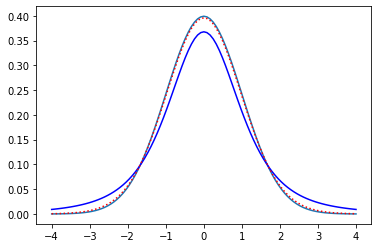

In [ ]:
# specify the x range
x = np.linspace(-4,4,99)
y = st.norm.pdf(x, 0, 1)
df1 = 3
z1 = st.t.pdf(x,df1)
df2 = 30
z2 = st.t.pdf(x,df2)

plt.figure()
plt.plot(x,y) # normal pdf
plt.plot(x,z1, 'b') # t(3) distribution
plt.plot(x,z2, 'r:') # t(30)
plt.show()

### Simple t-test

**An Example**:

Suppose you want to examine whether a training method improves the ability to remember more words. You design a study with a pre-test, a training session, and a post-test for evaluating $n$ participants. To measure the learning effect, you calculate the difference score $X_i$ for each participant by subtracting the pre-test score from the post-test score. Now, you wish to determine if the training method has a significant impact on learning.

This question can be framed as a simple statistical test: You collect $n$ samples from a population with an unknown mean $\mu$ and want to test if the mean is 0. The null hypothesis is defined as:

$H_0$: The population mean is $\mu = 0$.

We denote the sample set as $\{X_i\}_{i=1,\ldots, n}$, with the sample mean $\bar{X}$ and the sample standard deviation $\hat{\sigma}$. The t-statistic can be constructed as follows:

$$ \frac{\bar{X} - \mu}{\hat{\sigma} / \sqrt{n-1}} \sim t(n-1). $$

For example, assume we have 10 difference scores: {4, 3, -2, -3, 5, 2, 4, 0, 1, 1}. The mean learning score for these samples is 1.5.

**Statistical Test**: _Was the learning method effective?_

**Idea Behind the t-test**

If we assume the samples are drawn from the population under the null hypothesis (mean of 0), the sample mean should not deviate significantly from zero. If the sample mean deviates too much (analogous to outliers, for instance, falling within the extreme 5% of the distribution), we can confidently reject the null hypothesis.

To illustrate this, we can visualize the sample mean's position within the t-distribution using the t-transformation.



1.7999999999999998 0.0526953357932044


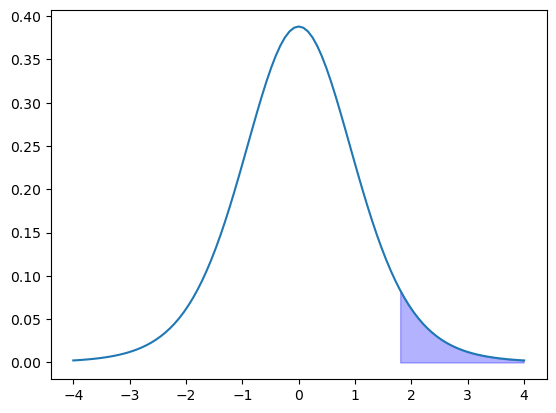

In [27]:
x = [4, 3, -2, -3, 5, 2, 4, 0, 1, 1]

t_val = np.mean(x)/(np.std(x)/np.sqrt(10-1))
print(t_val, 1-st.t.cdf(t_val,9))

fig, ax = plt.subplots()
xc = np.linspace(-4,4, 99)
tc = st.t.pdf(xc, 9) # degree of freedom (10-1 = 9)
ax.plot(xc, tc)
xt = np.arange(t_val, 4, 0.01)
ax.fill_between(xt, st.t.pdf(xt,9), alpha = 0.3, color = 'b')

Based on the p-value above (.954), we know it is not significant at the level of $\alpha = .05$. This can be confirmed by the one sample t-test from `scipy.stats.ttest_1samp()`. 

In [21]:
# one sample t-test from scipy.stats is ttest_1samp()
st.ttest_1samp(x, 0, alternative = 'greater')

TtestResult(statistic=1.7999999999999998, pvalue=0.05269533579320447, df=9)

In [23]:
#using Pingouin.ttest
pg.ttest(x, 0, alternative='greater')  # alernative default: two-sided, can be 'greater', 'less'. 

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,1.8,9,greater,0.053,"[-0.03, inf]",0.569,2.033,0.507


Python offers multiple ways to achieve the same results, with some packages providing more comprehensive outputs than others.

For example, the `t-test` function from the `pingouin` package offers additional outputs similar to those found in SPSS or R statistics, making it more informative than the `scipy` t-test, which only provides the t-value and p-value. 


### Alternative non-parameter test - Permutation test

The same statitical question can be treated in an alternative way. The null hypothesis is the samples come from the population with mean of 0 (i.e., no learning effect). So the learning effects we observe is simply random fluctuation. If we randomly flip the signs of the learning effect, it should make no difference. We can simulate random flipping for multiple times, and see what the mean distribution we observe. 

In [28]:
#to understand the following code, let's look how we generate 10 random signs
np.random.randint(0,2,10)*2 -1

array([ 1, -1, -1, -1,  1,  1,  1,  1,  1, -1])

The percentile of the observed data in the simultation: 0.941


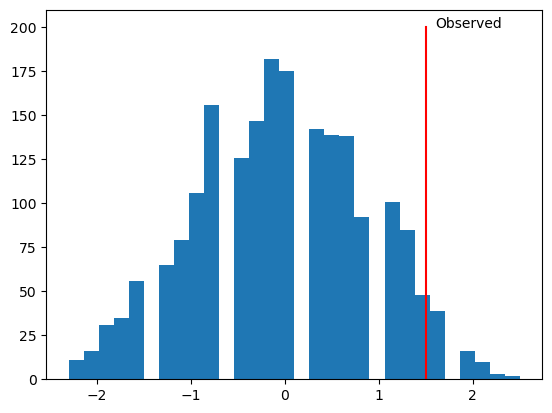

In [29]:
num_sim = 2000

sim_means = [np.mean((np.random.randint(0,2, 10)*2. -1)*x) for i in np.arange(num_sim)]
plt.figure()
plt.hist(sim_means, bins = 30)
plt.plot([np.mean(x), np.mean(x)],[0, 200],'r')
plt.annotate('Observed', xy = (np.mean(x)+0.1,200))

print('The percentile of the observed data in the simultation:', np.mean(sim_means<np.mean(x)))

__Permutation test__

The above non-parameter test using simulation is a typical example of [permutation test](https://en.wikipedia.org/wiki/Permutation_test). 
Permutation test is a type of statistical test under the null hypothesis by calculating all possible values of the test statistic under all possible rearrangements of the observed data points. 

## 4. ANOVA tests

When the number of factor levels is greater than 2, multiple t-tests would cause potential false positive results. This is because if we set the significant level at $\alpha = 0.05$, three multiple comparison (t-tests) will yield $\alpha = 1 - (1-0.05)^3 \simeq 0.14$, way higher than $0.05$. 

Analysis of variance (ANOVA) is used to compare the mean among three or more levels / groups. For example, the above example about the number of species of penguin is three. 

__Basic idea behind ANOVA__: The total variance of the sampled data can be decomposed into systematic variance (between group) and residual variance (within group):

$$ SSE_{total} = SSE_{between} + SSE_{within} $$

If the average variation between groups is large enough compared to the average variation within groups, then we should expect at least one group has different means as the other groups. 

So we can construct a ratio variable,

$$ f = \frac{MSE_{between}}{MSE_{within}},$$

where $MSE_i = SSE_i/df_i$.
This random variable follows the F-distribution (F-test). 

ANOVA tests only tell you there is difference or not among groups, but not about which group is significant from which. In order to get the significance between groups, we need to run further post-hoc test (multiple comparisons). In order to correct the problem of multiple comparisons, we need to apply some correction method, such as Bonferroni, Tukey correction. 

__Repeated measures ANOVA__
In psychology, we often use within-subject design, testing multiple conditions within each participants to reduce influences of individual differences. If the number of comparison conditions is only two, this would be reduced to the paired t-test. Before calculating the significance level, Mauchly's test is needed to assess the homogeneity of the variance (i.e., sphericity) with all possible pairs. If there is any violation of sphericity, you should select a corrected method, such as Greenhouse-Geisser method. 


In [30]:
# An example from pingouin package
df = pg.read_dataset('penguins') # example dataset from Pingouin

df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Biscoe,37.8,18.3,174.0,3400.0,female
1,Adelie,Biscoe,37.7,18.7,180.0,3600.0,male
2,Adelie,Biscoe,35.9,19.2,189.0,3800.0,female
3,Adelie,Biscoe,38.2,18.1,185.0,3950.0,male
4,Adelie,Biscoe,38.8,17.2,180.0,3800.0,male


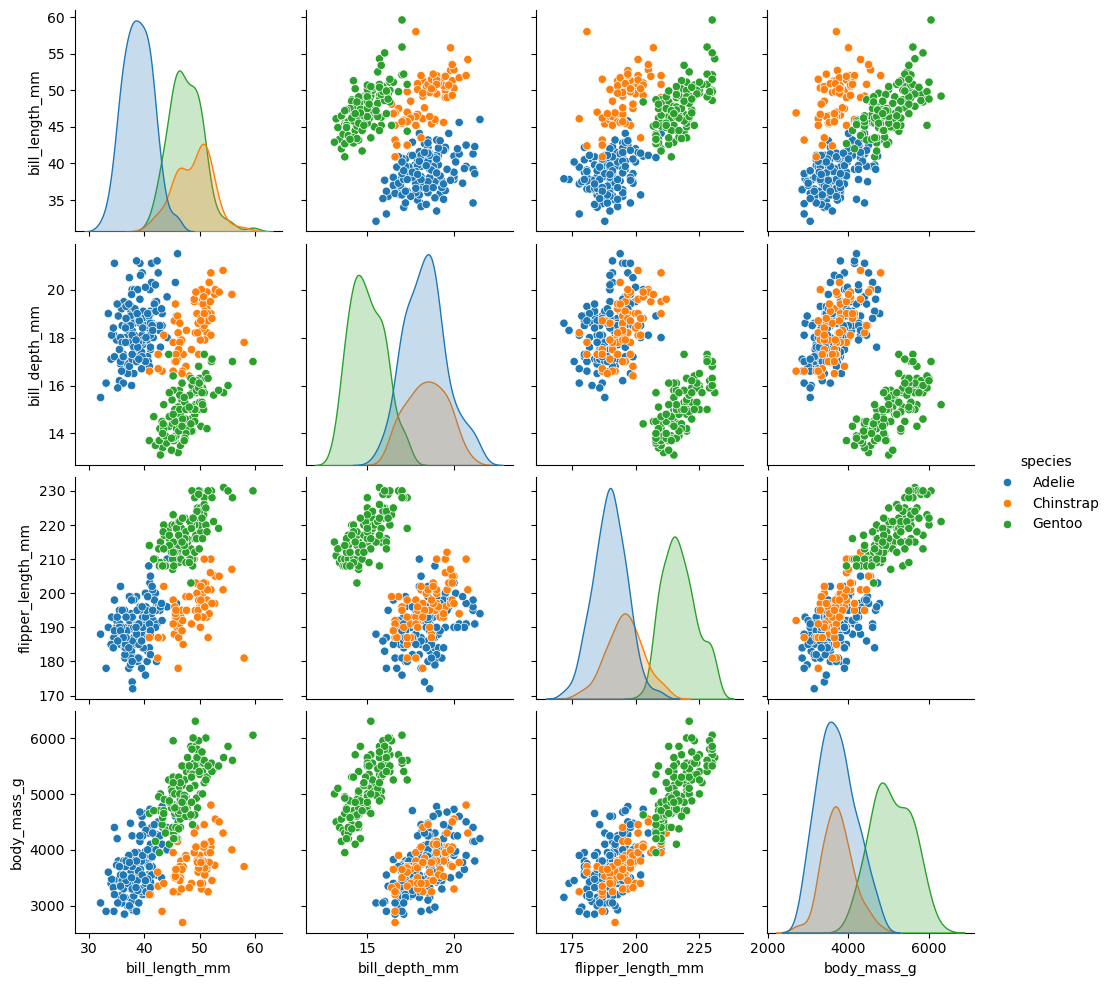

In [31]:
# lets visualize data using seaborn.pairplot()
sns.pairplot(df, hue = 'species')

ANOVA test usign a pandas DataFrame. 

In [32]:
pg.anova(data = df, dv = 'flipper_length_mm', between = 'species')

,Source,ddof1,ddof2,F,p-unc,np2
0,species,2,339,594.802,1.352e-111,0.778


The results show that there is a significant difference between the means of of three groups. Now we need to do post-hoc comparisons to find out which group is different from which group. 

For selecting tests and functions, `pingouin` provides a nice guideline flow chart below:

![](https://pingouin-stats.org/_images/flowchart_one_way_ANOVA.svg). 
For the simple ANOVA post-hoc comparison, we should select Tukey-HSD test. 

In [33]:
# post-hoc comparison, the input parameters are similar to the ANOVA

posthoc = pg.pairwise_tukey(data = df, dv = 'flipper_length_mm', between = 'species')
posthoc

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,Adelie,Chinstrap,189.954,195.824,-5.870,0.970,-6.052,1.137e-08,-0.869
1,Adelie,Gentoo,189.954,217.187,-27.233,0.807,-33.760,1.443e-14,-4.169
2,Chinstrap,Gentoo,195.824,217.187,-21.363,1.004,-21.286,1.443e-14,-3.166


### Exercise
Now let's look into a practical dataset about the relation of student performance to some potential factors (gender, race, lunch etc.) for an exercise. 

First we import the data from kaggle [students-performance-in-exams](https://www.kaggle.com/spscientist/students-performance-in-exams). For your convenience, I also made a copy in github. You can use the following URL to load the data

In [35]:
performance = pd.read_csv('https://raw.githubusercontent.com/strongway/tutorial_data_science/refs/heads/master/lecture_2021/StudentsPerformance.csv')
performance.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [36]:
# we add additional column total_score
performance['total_score'] = performance['math score'] + performance['reading score'] + performance['writing score']
performance.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


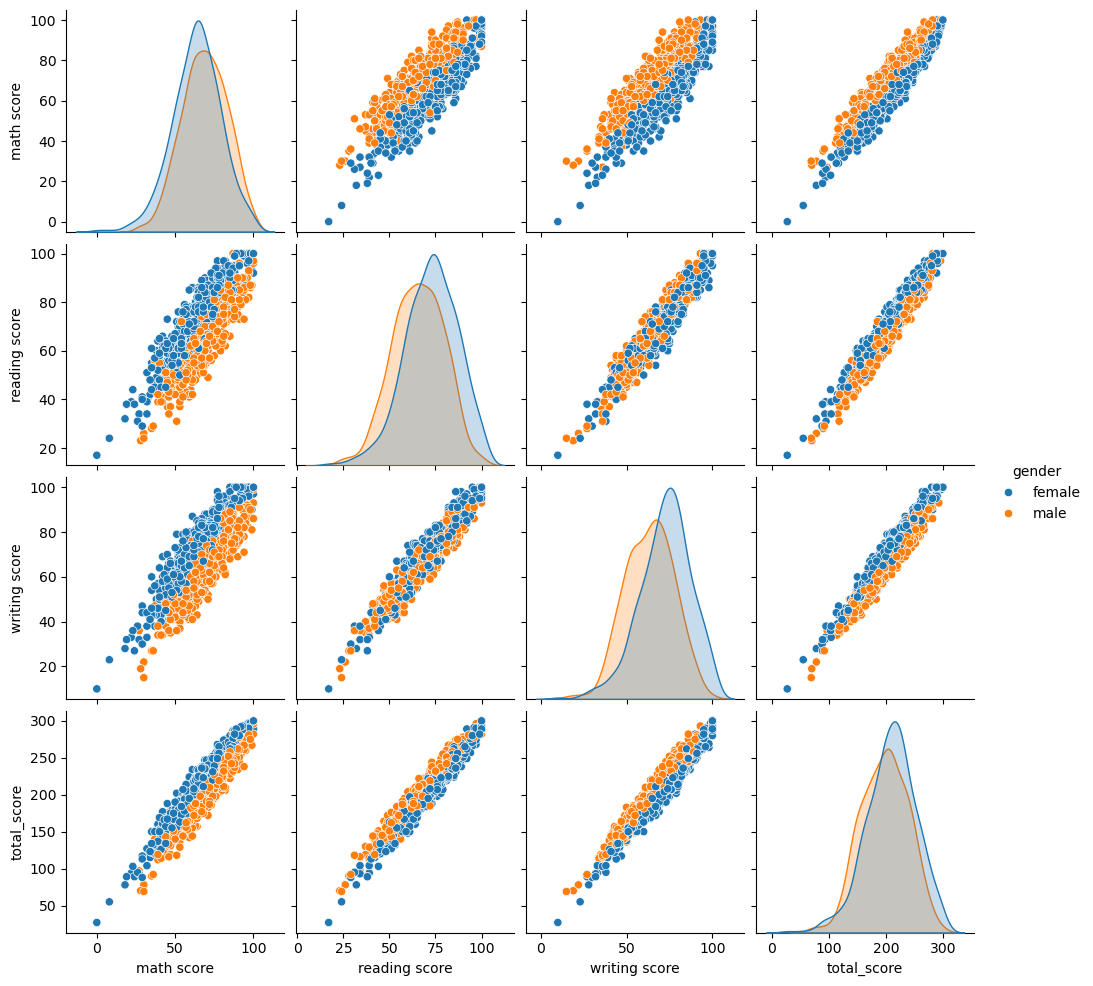

In [37]:
sns.pairplot(performance, hue = 'gender')

In [ ]:
# Your task: please visulize the relations using pairplot() separate for 'lunch', or 'race/ethnicity'
#sb.pairplot(performance, hue = '___')

Let's check if there is any significant difference between genders. 


In [38]:
p_male = performance.query('gender == "male"')
p_female = performance.query('gender == "female"')
pg.ttest(p_male.total_score, p_female.total_score)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-4.179,997.847,two-sided,3.186e-05,"[-16.45, -5.94]",0.264,361.725,0.986


Now let's check if there are any differences among races for the total_score. 
How many races do we have in the data? Should we apply t-test or ANOVA?

In [ ]:
performance['race/ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [ ]:
#your code here
#

#### Solution


In [39]:
# print mean, std, se of each group
print(performance.groupby('race/ethnicity').total_score.agg(['mean','std','count']))

# classical ANOVA test
pg.anova(data = performance, dv = 'total_score', between = 'race/ethnicity' )

                   mean     std  count
race/ethnicity                        
group A         188.978  43.334     89
group B         196.405  44.196    190
group C         201.395  41.617    319
group D         207.538  39.758    262
group E         218.257  43.695    140


,Source,ddof1,ddof2,F,p-unc,np2
0,race/ethnicity,4,995,9.096,3.226e-07,0.035


### Repeated-measures ANOVA

In behavioral studies, individual differences among participants can be substantial. To mitigate the impact of these differences, researchers often employ a _within-subject_ design. This approach involves measuring multiple conditions within each participant, ensuring that all participants are exposed to the same conditions. Similar to classical ANOVA, the core idea of repeated-measures ANOVA is to partition the sums of variance. In classical ANOVA, the total sum of squares is divided into between-group and within-group variances:

$$ SS_{Total} = SS_{Between} + SS_{Within}$$

In a repeated-measures design, the within-group variance ($SS_{Within}$) is further partitioned into variance due to subjects and error variance, resulting in the following formula:

$$ SS_{Total} = SS_{Effect} + SS_{Subjects} + SS_{Error}$$

The F-test is then constructed as follows:

$$ f = \frac{MSE_{Effect}}{MSE_{Error}}$$

#### An Example
Let's take a real example from one of my studies: Zhu, X., Baykan, C., Müller, H. J., & Shi, Z. (2021). Temporal bisection is influenced by ensemble statistics of the stimulus set. Attention, Perception & Psychophysics, 83(3), 1201–1214. https://doi.org/10.3758/s13414-020-02202-z

In this study, we examined how ensemble statistics influence temporal bisection. We estimated the point of subjective equality (PSE) for each condition and used this PSE to determine if there were significant changes in duration perception. The detailed design and estimation method (from logistic regression) are omitted here, focusing instead on the statistical tests.

The results from Experiment 1 are shown below:

![](https://media.springernature.com/lw685/springer-static/image/art%3A10.3758%2Fs13414-020-02202-z/MediaObjects/13414_2020_2202_Fig2_HTML.png?as=webp) 

The estimated PSEs are listed [here](https://raw.githubusercontent.com/msenselab/sets_in_bisection/master/modelling/psy_quickpsy_observed.csv). Note, the estimated results are pooled together from three experiments. Rows 1-30 belong to Experiment 1, 31-60 Experiment 2, 61 - 90 Experiment 3. 

In [40]:
data = pd.read_csv('https://raw.githubusercontent.com/msenselab/sets_in_bisection/master/modelling/psy_quickpsy_observed.csv')
data.head()


,Unnamed: 0,cond,NSub,jnd,pse,slope
0,1,PS,1,128.316,1079.644,2.639
1,2,PS,2,105.319,1032.560,2.700
2,3,PS,3,183.720,816.774,2.497
3,4,PS,4,100.547,663.981,2.713
4,5,PS,5,141.699,656.080,2.604


In [42]:
# Let's test PSEs for Experiment 1
exp1 = data.loc[0:29] # indexing from 0!
pg.pairwise_tests(data = exp1, dv = 'pse', within = 'cond', subject = 'NSub')

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,cond,NS,PS,True,True,4.598,14.0,two-sided,4.141e-04,82.828,0.607


In [43]:
# Alternative ANOVA also provide the same result
pg.rm_anova(data = exp1, dv = 'pse', within = 'cond', subject = 'NSub')

,Source,ddof1,ddof2,F,p-unc,ng2,eps
0,cond,1,14,21.141,4.141e-04,0.094,1.0


### Exercise

Please test Experiment 3, and check if PSEs were different between two conditions. 

In [ ]:
# not run, please fix the code
exp3 = data.loc[__:__] # indexing from 0!
pg.pairwise_ttests(data = exp3, dv = __, within = ____, subject = ___)

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,cond,I T-shaped,U-shaped,True,True,0.033,14.0,two-sided,0.974,0.263,0.01


## Correlation analysis

Here is the flow chart from pingouin official website:

![](https://pingouin-stats.org/_images/flowchart_correlations.svg)


HZResults(hz=0.8115667538892215, pval=0.2848198723544616, normal=True)


,n,r,CI95%,p-val,BF10,power
pearson,500,-0.01,"[-0.1, 0.08]",0.817,0.058,0.056


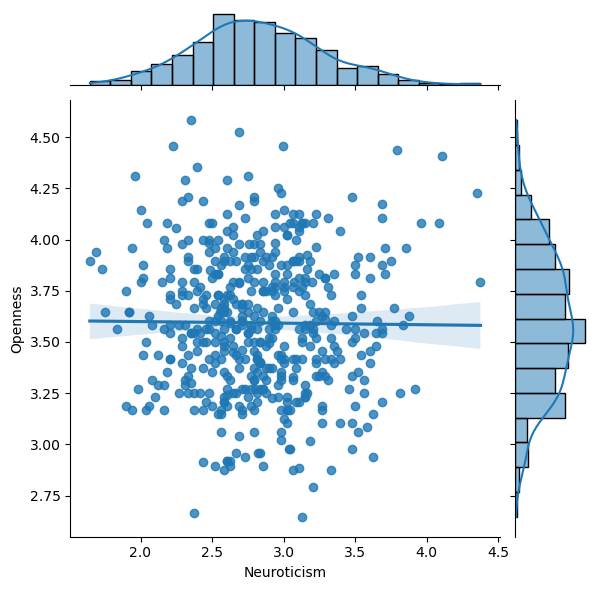

In [44]:
# offical example

# Load an example dataset with the personality scores of 500 participants
df = pg.read_dataset('pairwise_corr')

# 1.Test for bivariate normality (optional)
print(pg.multivariate_normality(df[['Neuroticism', 'Openness']]))

# 1bis. Visual inspection with a histogram + scatter plot (optional)
sns.jointplot(data=df, x='Neuroticism', y='Openness', kind='reg')

# 2. If the data have a bivariate normal distribution and no clear outlier(s), we can use a regular Pearson correlation
pg.corr(df['Neuroticism'], df['Openness'], method='pearson')



## Practice

Now let's practice with a real dataset. We will use the data from a visual search study published in 2019:

Shi, Z., Allenmark, F., Zhu, X., Elliott, M. A., & Müller, H. J. (2019). To quit or not to quit in dynamic search. Attention, Perception & Psychophysics. https://doi.org/10.3758/s13414-019-01857-7

This study examined the quiting process in (dynamic) visual search. The search display could be static (standard) or dynamic (changed every 110 ms). And participants had to find the target presence (T) among distractors (Ls). The set size was 8, 12, or 16. The dependent variable was the reaction time (RT) to find the target presence or not. 

The original data analysis and modeling were done in R. Here we will use Python to re-analyze the data. We will do the following steps:
- Examing the data and reaction time distributions, determing the outliers
- Estimate the error rates and mean reaction times for each condition
- Perform statistical tests 




## Import raw data and examine RT distributions

First, we import the data from the study. The data is stored in a csv file.

In [45]:
url = 'https://raw.githubusercontent.com/msenselab/dynamic_search/master/data/exp1.csv'
dat = pd.read_csv(url)
dat.head()

,target,setsize,dyn,resp,rt,sub,exp,correct
0,Absent,12,Static,2,2.583,1,1,1
1,Absent,8,Static,2,0.936,1,1,1
2,Present,16,Static,1,0.795,1,1,1
3,Present,8,Static,1,1.242,1,1,1
4,Absent,12,Static,2,1.759,1,1,1


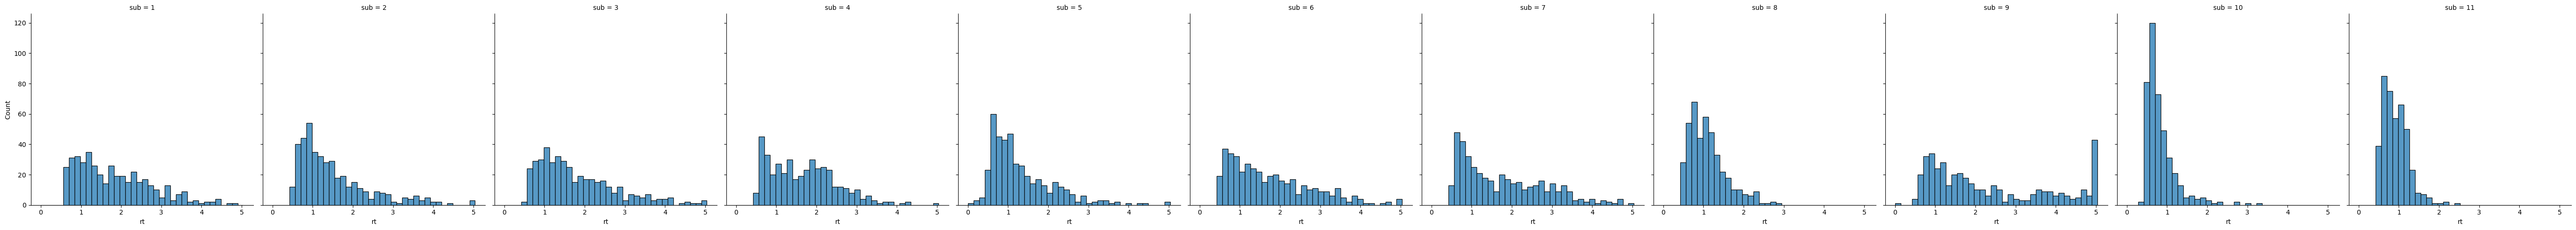

In [46]:
# use seaborn distribution plot (distplot) to visualize the RT distribution
# inpsect individual histogram of RT distribution
sns.displot(data = dat, x = 'rt', col = 'sub')

As you notice, the RT distributions vary a lot among participants, and some participants had very long RTs (outliers or errors around 5 seconds, e.g., sub = 9). We need to remove these outliers before further analysis.

### Identifying outliers using the MAD method

The Median Absolute Deviation (MAD) is a robust statistical method used to identify outliers, especially useful for data like reaction times (RTs) where outliers can significantly impact the analysis. MAD is calculated by taking the median of the absolute deviations from the median of the dataset. This approach is less sensitive to extreme values compared to standard deviation-based methods.

In [47]:
import numpy as np
import pandas as pd

# Step 1: Filter and calculate MAD for each subject
subm = dat.query('rt < 5 & correct == 1').groupby('sub').rt.agg(
    ['mean', 'std',
     ('median', 'median'),
     ('mad', lambda x: np.median(np.abs(x - np.median(x))))
    ]).reset_index()

subm.head()

,sub,mean,std,median,mad
0,1,1.810,0.918,1.654,0.647
1,2,1.461,0.833,1.195,0.412
2,3,1.730,0.896,1.507,0.559
3,4,1.659,0.808,1.577,0.618
4,5,1.297,0.713,1.077,0.400


In [49]:
# Step 2: Merge MAD data with the original dataset
dat_f = pd.merge(dat, subm, on='sub').assign(
	outlier=lambda x: np.abs(x['rt'] - x['median']) > (3 * x['mad'])
).drop(columns=['mean', 'std', 'median', 'mad'])

# Display the result
dat_f.head()

,target,setsize,dyn,resp,rt,sub,exp,correct,outlier
0,Absent,12,Static,2,2.583,1,1,1,False
1,Absent,8,Static,2,0.936,1,1,1,False
2,Present,16,Static,1,0.795,1,1,1,False
3,Present,8,Static,1,1.242,1,1,1,False
4,Absent,12,Static,2,1.759,1,1,1,False


In [ ]:
### Calculate Error rates for each subject and condition
### FIXME - not run, please fix the code
err_rate = dat_f.groupby(['sub', 'target', 'dyn']).FIXME.agg(
	[('error_rate', lambda x: 1 - np.mean(x))]).reset_index()	
err_rate.head()

,sub,target,dyn,error_rate
0,1,Absent,Dynamic,0.038
1,1,Absent,Static,0.000
2,1,Present,Dynamic,0.038
3,1,Present,Static,0.019
4,2,Absent,Dynamic,0.152


In [ ]:
# compare if the error rate is different between conditions
# FixME with the code below
pg.rm_anova(data = err_rate, dv = 'FIXME', FIXME = ['target', 'dyn'], subject = 'FIXME')

/Users/strongway/miniconda3/lib/python3.11/site-packages/pingouin/distribution.py:507: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  data.groupby(level=1, axis=1, observed=True, group_keys=False)
/Users/strongway/miniconda3/lib/python3.11/site-packages/pingouin/distribution.py:508: FutureWarning: DataFrameGroupBy.diff with axis=1 is deprecated and will be removed in a future version. Operate on the un-grouped DataFrame instead
  .diff(axis=1)


,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,target,0.005,1,10,0.005,0.916,0.361,0.361,0.017,1.0
1,dyn,0.078,1,10,0.078,8.176,0.017,0.017,0.219,1.0
2,target * dyn,0.023,1,10,0.023,10.454,0.009,0.009,0.075,1.0


Next, we analyze correct mean RTs based on valid data and correct trials. We average the RTs for each condition and participant, then calculate the mean RTs for each condition.

In [ ]:
# use the chain rule to quickly get mean RTs. 
# note: you can use () to break the lines
# FIXME - not run, please fix the code
mrt = (dat_f.query('correct ==1 and outlier == False')
	   .FIXME(['sub', 'target', 'dyn','setsize'])
	   .FIXME.mean().reset_index()
	   )
mrt.head()

,sub,target,dyn,setsize,rt
0,1,Absent,Dynamic,8,2.345
1,1,Absent,Dynamic,12,2.769
2,1,Absent,Dynamic,16,2.753
3,1,Absent,Static,8,1.622
4,1,Absent,Static,12,2.054


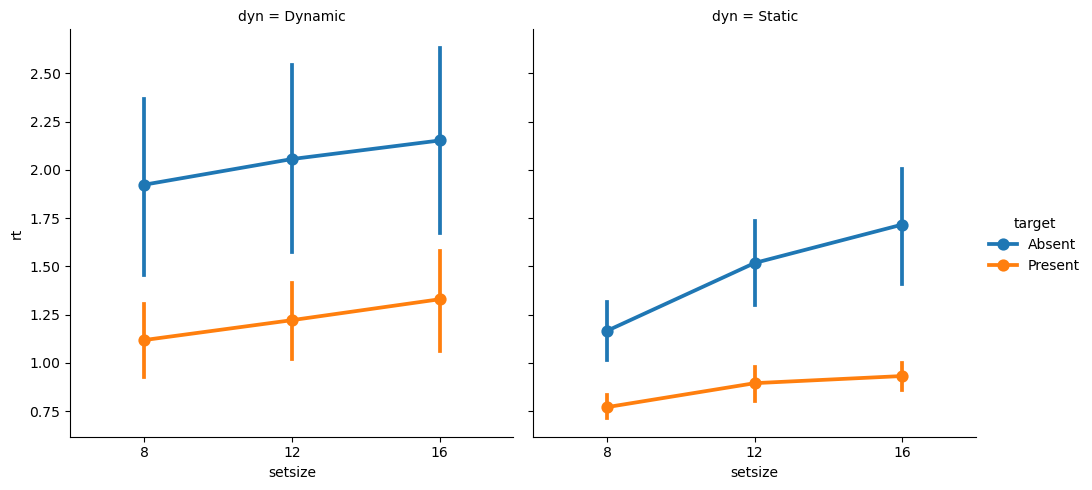

In [ ]:
# Let's first visualize the mean RTs
# FIXME - not run, please fix the code: column using search type 'dyn', color using target type
sns.catplot(data = mrt, x = 'setsize', y = 'rt', 
			FIXME = 'target', FIXME = 'dyn', kind = 'point')

In [ ]:
# Let's run a repeated-measures ANOVA for the dynamic search task
# FIXME - not run, please fix the code
pg.rm_anova(data = mrt.FIXME('dyn == "Dynamic"'), FIXME = 'rt', 
			FIXME = ['setsize', 'target'], subject = 'sub', detailed = True).round(3)

/Users/strongway/miniconda3/lib/python3.11/site-packages/pingouin/distribution.py:507: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  data.groupby(level=1, axis=1, observed=True, group_keys=False)
/Users/strongway/miniconda3/lib/python3.11/site-packages/pingouin/distribution.py:508: FutureWarning: DataFrameGroupBy.diff with axis=1 is deprecated and will be removed in a future version. Operate on the un-grouped DataFrame instead
  .diff(axis=1)


,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,setsize,0.534,2,20,0.267,20.283,0.000,0.000,0.020,0.821
1,target,11.099,1,10,11.099,26.659,0.000,0.000,0.299,1.000
2,setsize * target,0.002,2,20,0.001,0.112,0.894,0.861,0.000,0.835


Note: `pingouin` does not provide a three-way repeated-measures ANOVA. We can use `statsmodels` to perform this analysis.

In [65]:
from statsmodels.stats.anova import AnovaRM

av1 = AnovaRM(data = mrt, 
		depvar = 'rt', subject = 'sub', within = ['setsize', 'target','dyn']).fit()
av1.summary()

,F Value,Num DF,Den DF,Pr > F
setsize,46.6874,2.0000,20.0000,0.0000
target,35.6669,1.0000,10.0000,0.0001
dyn,13.4305,1.0000,10.0000,0.0044
setsize:target,13.8453,2.0000,20.0000,0.0002
setsize:dyn,7.6868,2.0000,20.0000,0.0033
target:dyn,4.2095,1.0000,10.0000,0.0673
setsize:target:dyn,8.2667,2.0000,20.0000,0.0024
